# Project

Machine Learning and Statistics

winter 23/24

Jamie Roche
***

### Supervised learning Vs Unsupervised learning

https://www.ibm.com/blog/supervised-vs-unsupervised-learning/

Supervised learning is where the algorithms learn based of human labelled training sets of data. 
The algorithm iterates through the data set making predictions based on the labelled initial training data sets.
Making changes to the algorithm to ensure the correct predictions are made.  
This requires initial set up by the creator of the algorithms, labelling data and splitting them for training and testing.

Unsupervised learning is where the algorithm does not have initial labelled data and must work through the dataset to determine the structure. 

Supervised learning typically performs better over unsupervised learning, but does require initial assistance from the creator to provide labelled training and testing data sets.


### Classification Algorithms
https://www.datacamp.com/blog/classification-machine-learning#
https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning

Classification algorithms are algorithms that use the supervised machine learning technique.
The model is trained using a training data set. This trained model then is tested against a test data set to determine how accurate the model is. 

When training and testing is complete the algorithm can then classify new unknown pieces of data to their respective category or class. 

Classification algorithms use patterns to sort data in to specified classes, or categories. 



### K-Nearest Neighbors Algorithm

https://www.ibm.com/topics/knn
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

K nearest neighbours’ classifier is a supervised learning technique, KNN uses the closeness of a data point to the trained model to classify the data point in the specifies class or categories. 

The KNN model takes the K number of points around the data to categorise the data point into an existing class. 
The default value for 5 in SciKit learn package is 5, for instance the data would be compared to the 5 closest points in the training model and categorised the same as whichever class as that most points closest to the model. 

It is advisable to have k set to a number that in not divisible by the number of classes to prevent a tie in number of closest points to the new data point, as the class which has the closest points will be the point at which the data point is categorised into. 

KNN uses the Euclidean distance to determine how close a point is to the nearest points. 
The Euclidean distance is the measure of the straight line from the existing point to the new data point. 

The formula for Euclidean distance:


$$ d(x,y)= \sqrt {\sum _{i=1}^n(y_i-x_i)^2} $$






In [512]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
import sklearn.decomposition as dec
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.naive_bayes as NB
import sklearn.tree as DT

In [513]:
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


df = pd.read_csv(url,sep=',',encoding='utf-8',)
df_NoNA = df.dropna()
df_NoNA

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [514]:
# Create sub data frames of each speices 
IrisSetosaGroup = df_NoNA[df_NoNA["species"].isin(['setosa'])]

In [515]:
IrisVersicolorGroup = df_NoNA[df_NoNA["species"].isin(['versicolor'])]

In [516]:
IrisVirginicaGroup = df_NoNA[df_NoNA["species"].isin(['virginica'])]

### Create histograms of individual species

Create individual histograms of species of the Iris plants based on different parameters. 
To determine the best variable to preform classification on. 
Based on the below histograms, figs 1.1 - 1.4, it can be seen that the petal length and width have the least overlap of the categorising data. There is quite a lot of overlap between all species when it comes to sepal length and width.


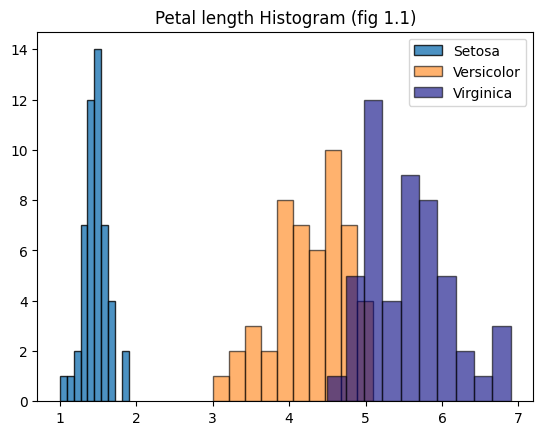

In [517]:
plt.hist(IrisSetosaGroup['petal_length'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['petal_length'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['petal_length'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Petal length Histogram (fig 1.1)')
plt.show() 

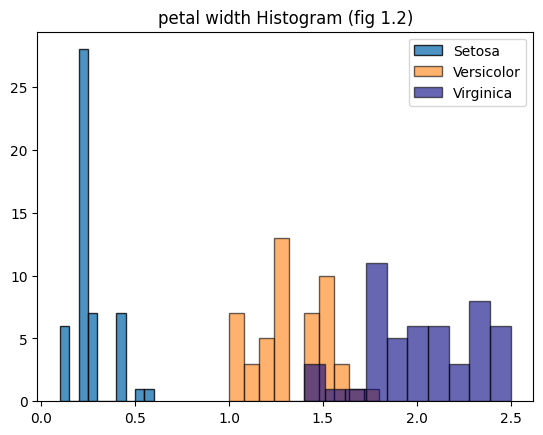

In [518]:
plt.hist(IrisSetosaGroup['petal_width'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['petal_width'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['petal_width'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('petal width Histogram (fig 1.2)')
plt.show() 

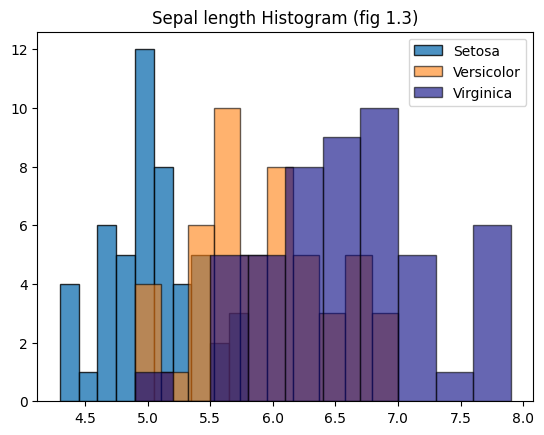

In [519]:
plt.hist(IrisSetosaGroup['sepal_length'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['sepal_length'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['sepal_length'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Sepal length Histogram (fig 1.3)')
plt.show() 

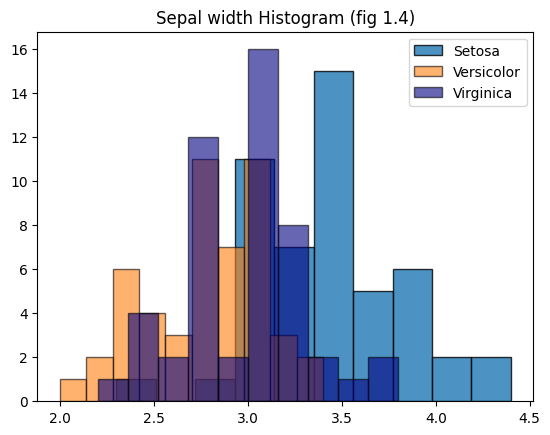

In [520]:
plt.hist(IrisSetosaGroup['sepal_width'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['sepal_width'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['sepal_width'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Sepal width Histogram (fig 1.4)')
plt.show() 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

complete 2 methods of classification, logistic regression and KNN,
use both non scaled and .
scaled PCA, maybe try just petals, as sepal has the most overlap
analysis of which combination provided the best results. 

### Perform nearest neighbor classification on the data based on mulitple variations of selected data. 
The first classification is done based on sepal length and width. 
The second is done on petal length and width.
The third is done using scaled data and using Principal component analysis to minimise the data to two dimensions for better readability. 
The final nearest neighbour classification is done using Principal component analysis without scaling. 


In [521]:
clf = KNeighborsClassifier()

X1 = df_NoNA[['sepal_length','sepal_width']]
X2 =df_NoNA[['petal_length','petal_width']]

In [522]:
Y=df_NoNA['species']

In [523]:
sumOutX1 = 0
for k in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X1,Y,test_size=0.33) 

    clf.fit(X_train,y_train)

    res = clf.predict(X_test) == y_test
    sumOutX1= sumOutX1 + np.sum(res)
resX1 = (sumOutX1/(len(y_test)*100))*100

resX1

76.46

In [524]:
cross_val_score(clf,X1,Y,cv=5)

array([0.73333333, 0.73333333, 0.76666667, 0.83333333, 0.73333333])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


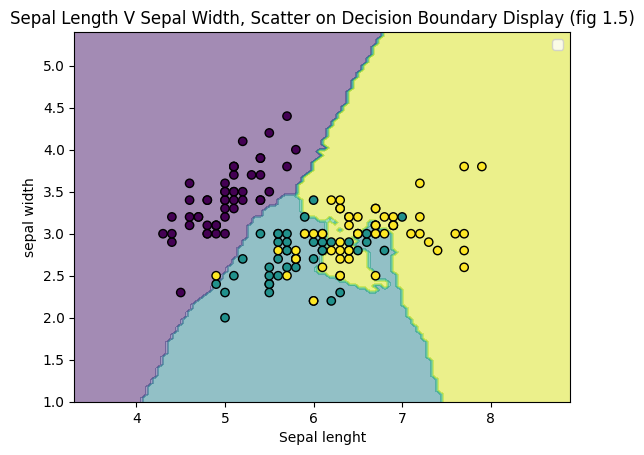

In [525]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X1, response_method="predict",
    xlabel="Sepal lenght", ylabel="sepal width",
    alpha=0.5,
)
disp.ax_.scatter(X1['sepal_length'], X1['sepal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('Sepal Length V Sepal Width, Scatter on Decision Boundary Display (fig 1.5)')
plt.show()

In [526]:
sumOutX2 = 0
for k in range(100):
    X2_train,X2_test,y2_train,y2_test = train_test_split(X2,Y,test_size=0.33)

    clf.fit(X2_train,y2_train)

    res2 = clf.predict(X2_test) == y2_test
    sumOutX2= sumOutX2 + np.sum(res2)
resX2 = (sumOutX2/(len(y2_test)*100))*100

resX2

95.94

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


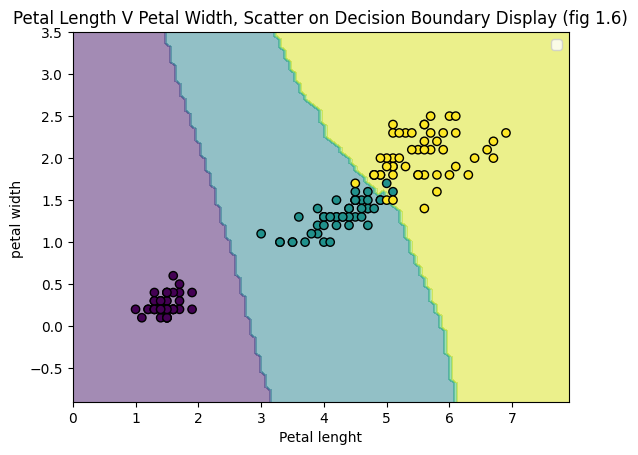

In [527]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X2, response_method="predict",
    xlabel="Petal lenght", ylabel="petal width ",
    alpha=0.5,
)
disp.ax_.scatter(X2['petal_length'], X2['petal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('Petal Length V Petal Width, Scatter on Decision Boundary Display (fig 1.6)')
plt.show()

In [528]:
pca = dec.PCA(n_components=2)

x = df_NoNA[['sepal_length', 'sepal_width', 'petal_length',  'petal_width']]
scaler = StandardScaler()

scaler.fit(x)

StandardScaler()

In [529]:
x_transform = scaler.transform(x)

TDF = pd.DataFrame(x_transform, columns=['sepal_length', 'sepal_width', 'petal_length',  'petal_width'])

pca.fit(TDF)

x_pca = pca.transform(TDF)

df_pca = pd.DataFrame(df[["species"]])
df_pca["pca0"] = x_pca[:,0]
df_pca["pca1"] = x_pca[:,1]

Text(0.5, 1.05, 'Pair Plot of Principal component analysis Fig. 1.7')

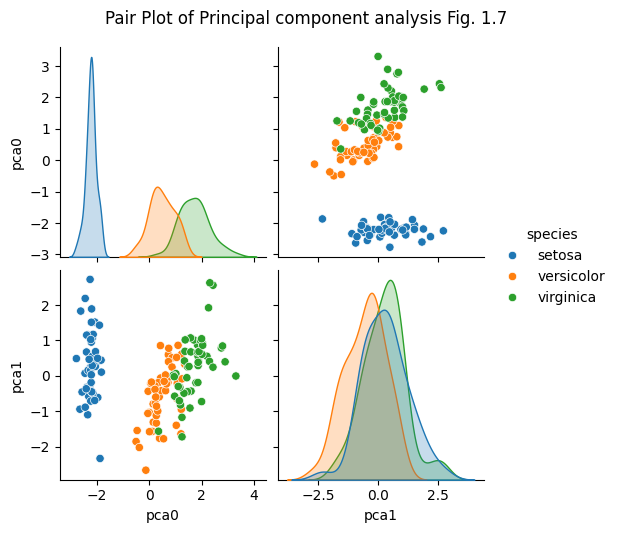

In [530]:
# https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid


g = sns.pairplot(df_pca,hue = "species")
g.fig.suptitle("Pair Plot of Principal component analysis Fig. 1.7",y=1.05)

In [531]:
clfpca = KNeighborsClassifier()

Xpca = df_pca[['pca0','pca1']]

In [532]:
Ypca=df_pca['species']

In [533]:
sumOutXpca = 0
for k in range(100):
    Xpca_train,Xpca_test,ypca_train,ypca_test = train_test_split(Xpca,Ypca,test_size=0.33) 

    clfpca.fit(Xpca_train,ypca_train)

    res3 = clfpca.predict(Xpca_test) == ypca_test
    sumOutXpca= sumOutXpca + np.sum(res3)
resXpca = (sumOutXpca/(len(ypca_test)*100))*100

resXpca


90.8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


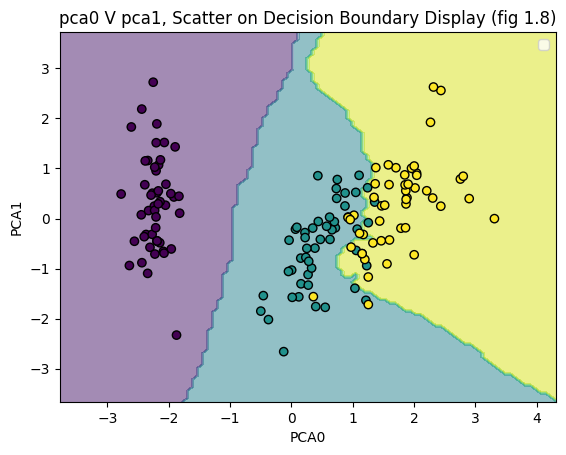

In [534]:
disp = DecisionBoundaryDisplay.from_estimator(
    clfpca, Xpca, response_method="predict",
    xlabel="PCA0", ylabel="PCA1",
    alpha=0.5,
)
disp.ax_.scatter(Xpca['pca0'], Xpca['pca1'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('pca0 V pca1, Scatter on Decision Boundary Display (fig 1.8)')
plt.show()

In [535]:
pcaNS = dec.PCA(n_components=2)


In [536]:
xNS = pd.DataFrame(df, columns=['sepal_length', 'sepal_width', 'petal_length',  'petal_width'])

pcaNS.fit(xNS)

x_pca = pca.transform(xNS)

df_pcaNS = pd.DataFrame(df[["species"]])
df_pcaNS["pca0NS"] = x_pca[:,0]
df_pcaNS["pca1NS"] = x_pca[:,1]

Text(0.5, 1.05, 'Pair Plot of Principal component analysis Without Scaling Fig. 1.9')

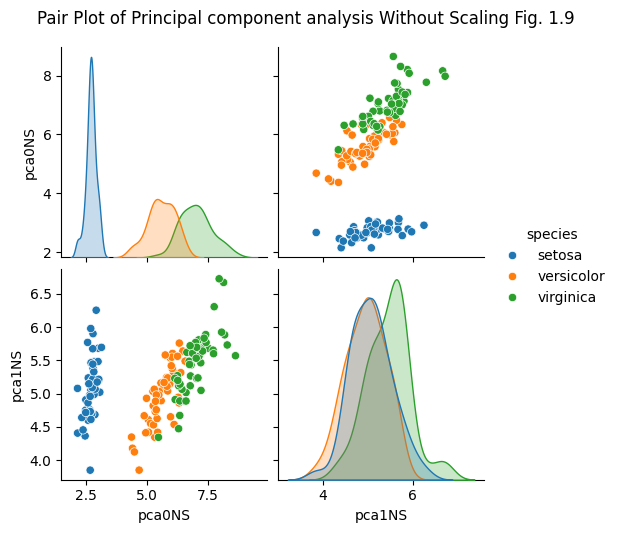

In [537]:
# https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid


g1 = sns.pairplot(df_pcaNS,hue = "species")
g1.fig.suptitle("Pair Plot of Principal component analysis Without Scaling Fig. 1.9",y=1.05)

In [538]:
df_pcaNS

clfpcaNS = KNeighborsClassifier()

XpcaNS = df_pcaNS[['pca0NS','pca1NS']]

In [539]:
YpcaNS=df_pcaNS['species']

In [540]:
sumOutXpcaNS = 0
for k in range(100):
    XpcaNS_train,XpcaNS_test,ypcaNS_train,ypcaNS_test = train_test_split(XpcaNS,YpcaNS,test_size=0.33) 

    clfpcaNS.fit(XpcaNS_train,ypcaNS_train)

    res4 = clfpcaNS.predict(XpcaNS_test) == ypcaNS_test
    sumOutXpcaNS= sumOutXpcaNS + np.sum(res4)
resXpcaNS = (sumOutXpcaNS/(len(ypcaNS_test)*100))*100

resXpcaNS


93.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


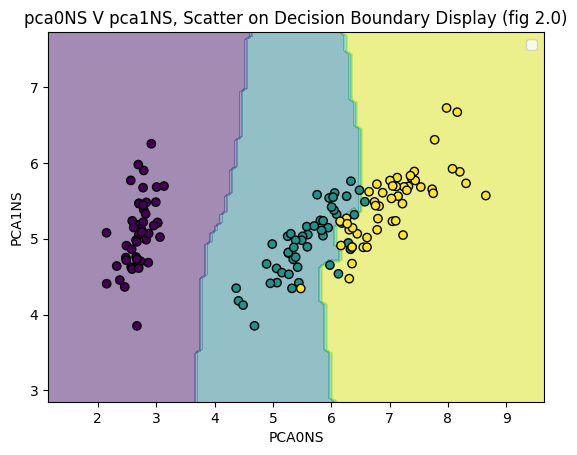

In [541]:
disp = DecisionBoundaryDisplay.from_estimator(
    clfpcaNS, XpcaNS, response_method="predict",
    xlabel="PCA0NS", ylabel="PCA1NS",
    alpha=0.5,
)
disp.ax_.scatter(XpcaNS['pca0NS'], XpcaNS['pca1NS'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('pca0NS V pca1NS, Scatter on Decision Boundary Display (fig 2.0)')
plt.show()

### Naive Baysian


In [542]:
SumNB = 0
gnb = NB.GaussianNB()
for k in range(100):
    input_trainNB,input_testNB,output_trainNB,output_testNB = mod.train_test_split(x,Y,test_size=0.333)
    y_pred1 = gnb.fit(input_trainNB,output_trainNB).predict(input_testNB)
    
    #this gets the sum of incorrect results over 100 runs 
    SumNB = SumNB + (output_testNB != y_pred1).sum()


NBRes = (((len(output_testNB)*100)-SumNB)/(len(output_testNB)*100))*100

print("Percenatge result of Naive Baysian averaged over 100 runs and a test size of .333: " + str(NBRes) + " %")

Percenatge result of Naive Baysian averaged over 100 runs and a test size of .333: 95.24000000000001 %


In [543]:
xPetal = df_NoNA[['petal_length',  'petal_width']]
Y=df_NoNA['species']

SumNBP = 0
gnbP = NB.GaussianNB()
for k in range(100):
    input_trainNBP,input_testNBP,output_trainNBP,output_testNBP = mod.train_test_split(xPetal,Y,test_size=0.333)
    y_predP1 = gnbP.fit(input_trainNBP,output_trainNBP).predict(input_testNBP)
    
    #this gets the sum of incorrect results over 100 runs 
    SumNBP = SumNBP + (output_testNBP != y_predP1).sum()


NBResP = (((len(output_testNBP)*100)-SumNBP)/(len(output_testNBP)*100))*100

print("Percenatge result of Naive Baysian averaged over 100 runs and a test size of .333: " + str(NBResP) + " %")


Percenatge result of Naive Baysian averaged over 100 runs and a test size of .333: 96.39999999999999 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


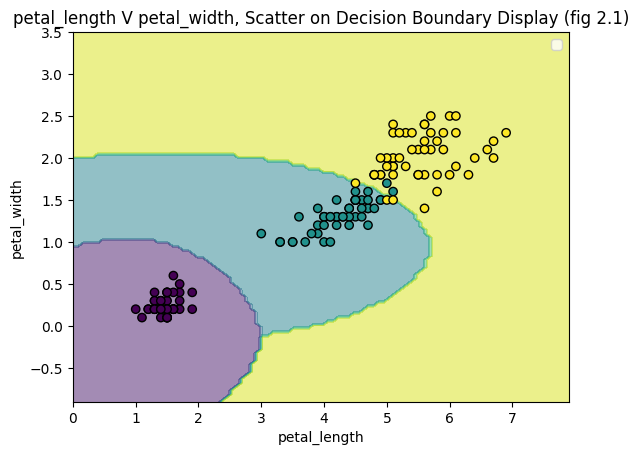

In [544]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnbP, xPetal, response_method="predict",
    xlabel="petal_length", ylabel="petal_width",
    alpha=0.5,
)
disp.ax_.scatter(xPetal['petal_length'], xPetal['petal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('petal_length V petal_width, Scatter on Decision Boundary Display (fig 2.1)')
plt.show()

In [545]:
xSepal = df_NoNA[['sepal_length',  'sepal_width']]
Y=df_NoNA['species']

SumNBS = 0
gnbS = NB.GaussianNB()
for k in range(100):
    input_trainNBS,input_testNBS,output_trainNBS,output_testNBS = mod.train_test_split(xSepal,Y,test_size=0.333)
    y_predS1 = gnbS.fit(input_trainNBS,output_trainNBS).predict(input_testNBS)
    
    #this gets the sum of incorrect results over 100 runs 
    SumNBS = SumNBS + (output_testNBS != y_predS1).sum()


NBResS = (((len(output_testNBS)*100)-SumNBS)/(len(output_testNBS)*100))*100

print("Percenatge result of Naive Baysian averaged over 100 runs and a test size of .333: " + str(NBResS) + " %")

Percenatge result of Naive Baysian averaged over 100 runs and a test size of .333: 78.14 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


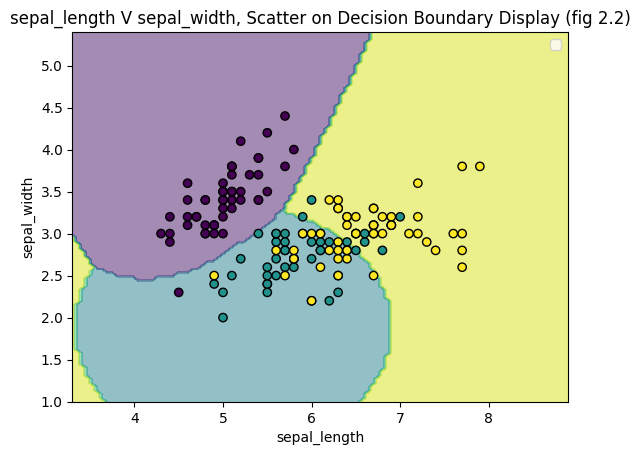

In [556]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnbS, xSepal, response_method="predict",
    xlabel="sepal_length", ylabel="sepal_width",
    alpha=0.5,
)
disp.ax_.scatter(xSepal['sepal_length'], xSepal['sepal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('sepal_length V sepal_width, Scatter on Decision Boundary Display (fig 2.2)')
plt.show()

In [547]:
SumNBPCA = 0
gnbPCA = NB.GaussianNB()
for k in range(100):
    input_trainNBPCA,input_testNBPCA,output_trainNBPCA,output_testNBPCA = mod.train_test_split(XpcaNS,YpcaNS,test_size=0.333)
    y_pred2 = gnbPCA.fit(input_trainNBPCA,output_trainNBPCA).predict(input_testNBPCA)
    
    #this gets the sum of incorrect results over 100 runs 
    SumNBPCA = SumNBPCA + (output_testNBPCA != y_pred2).sum()


NBResPCA = (((len(output_testNBPCA)*100)-SumNBPCA)/(len(output_testNBPCA)*100))*100

print("Percenatge result of Naive Baysian averaged over 100 runs and a test size of .333: " + str(NBResPCA) + " %")

Percenatge result of Naive Baysian averaged over 100 runs and a test size of .333: 88.94 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


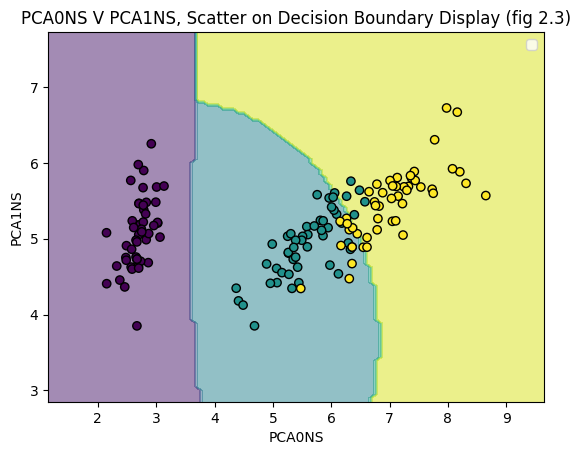

In [548]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnbPCA, XpcaNS, response_method="predict",
    xlabel="PCA0NS", ylabel="PCA1NS",
    alpha=0.5,
)
disp.ax_.scatter(XpcaNS['pca0NS'], XpcaNS['pca1NS'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('PCA0NS V PCA1NS, Scatter on Decision Boundary Display (fig 2.3)')
plt.show()

### J48 (Decision Tree Classification)

In [554]:
xPetal = df_NoNA[['petal_length',  'petal_width']]
Y=df_NoNA['species']
SumJ48P = 0

for x in range(100):
    input_trainJ48P,input_testJ48P,output_trainJ48P,output_testJ48P = mod.train_test_split(xPetal,Y,test_size=0.333)
    clf_entropy = DT.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(input_trainJ48P, output_trainJ48P)
    probP = clf_entropy.predict(input_testJ48P)
    SumJ48P = SumJ48P + ((output_testJ48P != probP).sum())


J48ResP = (((len(output_testJ48P)*100)-SumJ48P)/(len(output_testJ48P)*100))*100

print("Percenatge result of J48 averaged over 100 runs with a test size of .333: " + str(J48ResP) + " %")

Percenatge result of J48 averaged over 100 runs with a test size of .333: 93.86 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


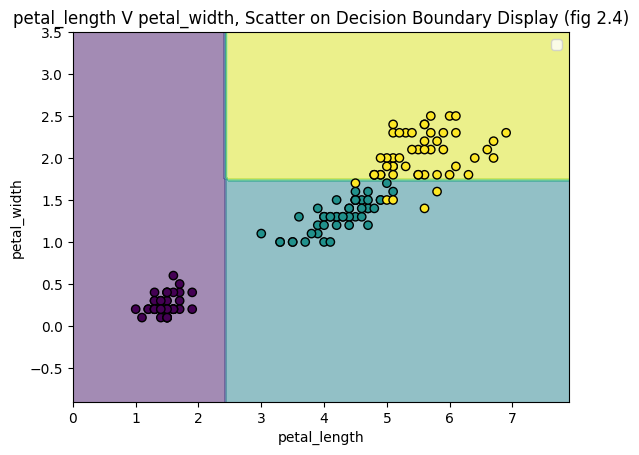

In [557]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf_entropy, xPetal, response_method="predict",
    xlabel="petal_length", ylabel="petal_width",
    alpha=0.5,
)
disp.ax_.scatter(xPetal['petal_length'], xPetal['petal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('petal_length V petal_width, Scatter on Decision Boundary Display (fig 2.4)')
plt.show()